In [36]:
from train import MaskCycleGANVCTraining
from mask_test import MaskCycleGANVCTesting as m1
from mask_test2 import MaskCycleGANVCTesting as m2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [38]:
def loadPickleFile(fileName):
    """Loads a Pickle file.

    Args:
        fileName (str): pickle file path

    Returns:
        file object: The loaded pickle file object
    """
    with open(fileName, 'rb') as f:
        return pickle.load(f)
    
def get_top_3_indices(arr):
    indices = np.argsort(arr)[:3]
    return indices

def plot_loss(load_id):
    data = pd.read_csv(f'outputs/loss_csv/{load_id}.csv')

    gloss= data['Generator Loss']
    dloss = data['Discriminator Loss']

    plt.plot(gloss, label="gloss")
    plt.plot(dloss, label="dloss")
    plt.title('Loss over Training')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [3]:
timeList = [0.9,1.1,1.2]
pitchList = [-2,-1,1,2]
noiseList = [0.1,0.2,0.3]
timePitchList= ['0.9-2', '0.9-1', '0.91', '0.92', '1.1-2', '1.1-1', '1.11', '1.12', '1.2-2', '1.2-1', '1.21', '1.22']

In [4]:
# mcdsFM = [0] * 8
# glossesFM = [0] * 8
# dlossesFM = [0] * 8
glossesFM = [2.2283271479766795, 2.207811973689341, 2.380725363283749, 2.278054367819524, 2.168506850260415, 0.31281769275665283, 0.23123151063919067, 0]
dlossesFM = [2.2283271479766795, 0.21292302012443542, 0.3295247554779053, 0.31994837522506714, 0.4232684373855591, 0, 0, 0]
mcdsFM = [46.079803, 45.794754, 45.54554, 45.51956, 46.53347, 47.059517, 46.192196, 0]

### Train 8 Augment types on Original Dataset
1. None
2. Time stretch timestretch
3. Pitch Shift pitchshift
4. Harmonic Distortion harmdist
5. White Noise noise
6. Frequency Mask freqmask=true
7. Time Stretch + Pitch Shift timepitch
8. Time Stretch + Freq Mask

#### VCC2SF3 => VCC2TM1

n_samples = 81
generator_lr_decay = 9.49667616334283e-10
discriminator_lr_decay = 9.496676163342831e-09


100%|██████████| 81/81 [00:28<00:00,  2.83it/s]


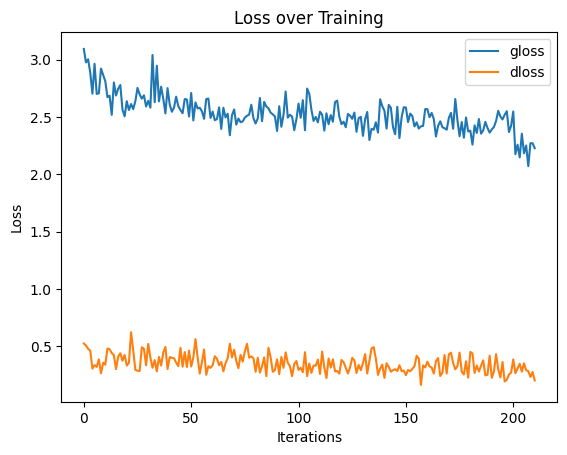

(3871.7536940574646, 30.013594527577244)


In [5]:
# # no augments
# train_id = 0
# speakerA = "VCC2SF3"
# speakerB = "VCC2TM1"
# cycleGAN = MaskCycleGANVCTraining(
#     speakerA=speakerA,
#     speakerB=speakerB,
#     datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
#     datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
#     train_id=train_id,
#     num_epochs=0
#     # num_epochs=130,
#     freq_mask=False,
#     augment_type=None,
#     aug_list=None,
#     load_id=None,
#     load_model=False
#     )
# loss0 = cycleGAN.train()
# glossesFM[0] = loss0[0][-1]
# dlossesFM[0] = loss0[0][-1]
# print(cycleGAN.get_training_time())

In [ ]:
plot_loss(0)

In [6]:
load_id = 0
speakerA = "VCC2SF3"
speakerB = "VCC2TM1"
test = m2(speakerA, speakerB, load_id)
mcds0 = test.test()
mcdsFM[0] = np.mean(mcds0)

100%|██████████| 10/10 [00:20<00:00,  2.08s/it]


n_samples = 81
generator_lr_decay = 9.49667616334283e-10
discriminator_lr_decay = 9.496676163342831e-09


100%|██████████| 81/81 [00:27<00:00,  2.98it/s]


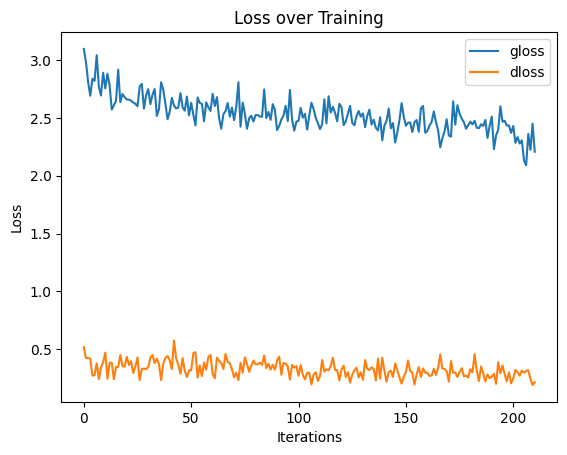

(3738.2680163383484, 28.97882183208022)


In [7]:
# # time stretch
# train_id = 1
# speakerA = "VCC2SF3"
# speakerB = "VCC2TM1"
# cycleGAN = MaskCycleGANVCTraining(
#     speakerA=speakerA,
#     speakerB=speakerB,
#     datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
#     datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
#     train_id=train_id,
#     num_epochs=130,
#     freq_mask=False,
#     augment_type="timestretch",
#     aug_list=timeList,
#     load_id=None,
#     load_model=False
#     )
# loss1 = cycleGAN.train()
# glossesFM[1] = loss1[0][-1]
# dlossesFM[1] = loss1[1][-1]
# print(cycleGAN.get_training_time())

In [ ]:
plot_loss(1)

In [8]:
load_id = 1
speakerA = "VCC2SF3"
speakerB = "VCC2TM1"
test = m2(speakerA, speakerB, load_id)
mcds1 = test.test()
mcdsFM[1] = np.mean(mcds1)

100%|██████████| 10/10 [00:23<00:00,  2.35s/it]


n_samples = 81
generator_lr_decay = 9.49667616334283e-10
discriminator_lr_decay = 9.496676163342831e-09


100%|██████████| 81/81 [00:27<00:00,  2.92it/s]


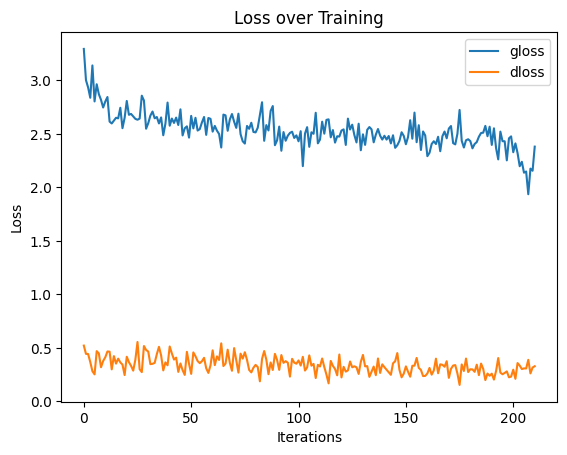

(3766.0048627853394, 29.193836145622786)


In [9]:
# # pitch shift
# train_id = 2
# speakerA = "VCC2SF3"
# speakerB = "VCC2TM1"
# cycleGAN = MaskCycleGANVCTraining(
#     speakerA=speakerA,
#     speakerB=speakerB,
#     datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
#     datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
#     train_id=train_id,
#     num_epochs=130,
#     freq_mask=False,
#     augment_type="pitchshift",
#     aug_list=pitchList,
#     load_id=None,
#     load_model=False
#     )
# loss2 = cycleGAN.train()
# glossesFM[2] = loss2[0][-1]
# dlossesFM[2] = loss2[1][-1]
# print(cycleGAN.get_training_time())

In [ ]:
plot_loss(2)

In [10]:
load_id = 2
speakerA = "VCC2SF3"
speakerB = "VCC2TM1"
test = m2(speakerA, speakerB, load_id)
mcds2 = test.test()
mcdsFM[2] = np.mean(mcds2)

Directory 'outputs/generated_audio/2' created successfully.


100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


n_samples = 81
generator_lr_decay = 9.49667616334283e-10
discriminator_lr_decay = 9.496676163342831e-09


100%|██████████| 81/81 [01:48<00:00,  1.34s/it]


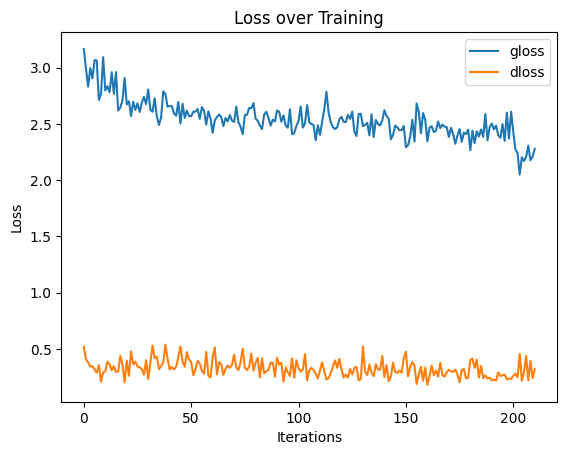

(14081.362901449203, 109.15785194921864)


In [12]:
# # pitch shift
# train_id = 3
# speakerA = "VCC2SF3"
# speakerB = "VCC2TM1"
# cycleGAN = MaskCycleGANVCTraining(
#     speakerA=speakerA,
#     speakerB=speakerB,
#     datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
#     datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
#     train_id=train_id,
#     num_epochs=130,
#     freq_mask=False,
#     augment_type="harmdist",
#     aug_list=None,
#     load_id=None,
#     load_model=False
#     )
# loss3 = cycleGAN.train()
# glossesFM[3] = loss3[0][-1]
# dlossesFM[3] = loss3[1][-1]
# print(cycleGAN.get_training_time())

In [ ]:
plot_loss(3)

In [13]:
load_id = 3
speakerA = "VCC2SF3"
speakerB = "VCC2TM1"
test = m2(speakerA, speakerB, load_id)
mcds3 = test.test()
mcdsFM[3] = np.mean(mcds3)

Directory 'outputs/generated_audio/3' created successfully.


100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


n_samples = 81
generator_lr_decay = 9.49667616334283e-10
discriminator_lr_decay = 9.496676163342831e-09


100%|██████████| 81/81 [00:28<00:00,  2.83it/s]


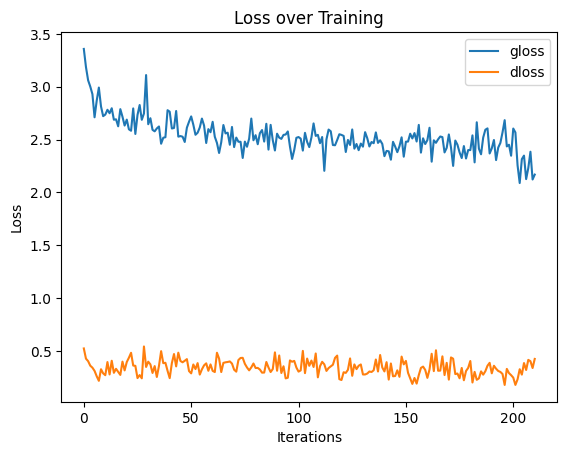

(13697.485897541046, 106.18206122124842)


In [14]:
# # white noise
# train_id = 4
# speakerA = "VCC2SF3"
# speakerB = "VCC2TM1"
# cycleGAN = MaskCycleGANVCTraining(
#     speakerA=speakerA,
#     speakerB=speakerB,
#     datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
#     datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
#     train_id=train_id,
#     num_epochs=130,
#     freq_mask=False,
#     augment_type="noise",
#     aug_list=noiseList,
#     load_id=None,
#     load_model=False
#     )
# loss4 = cycleGAN.train()
# glossesFM[4] = loss4[0][-1]
# dlossesFM[4] = loss4[1][-1]
# print(cycleGAN.get_training_time())

In [ ]:
plot_loss(4)

In [15]:
load_id = 4
speakerA = "VCC2SF3"
speakerB = "VCC2TM1"
test = m2(speakerA, speakerB, load_id)
mcds4 = test.test()
mcdsFM[4] = np.mean(mcds4)

Directory 'outputs/generated_audio/4' created successfully.


100%|██████████| 10/10 [00:19<00:00,  1.97s/it]


n_samples = 81
generator_lr_decay = 9.49667616334283e-10
discriminator_lr_decay = 9.496676163342831e-09


100%|██████████| 81/81 [00:26<00:00,  3.06it/s]


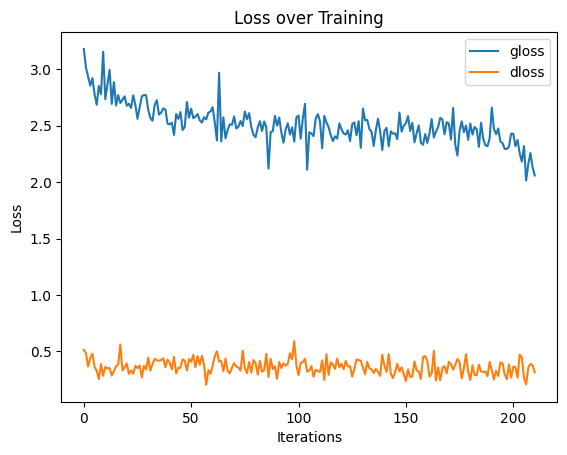

(3732.9850327968597, 28.937868471293488)


In [16]:
# # pitch shift
# train_id = 5
# speakerA = "VCC2SF3"
# speakerB = "VCC2TM1"
# cycleGAN = MaskCycleGANVCTraining(
#     speakerA=speakerA,
#     speakerB=speakerB,
#     datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
#     datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
#     train_id=train_id,
#     num_epochs=130,
#     freq_mask=True,
#     augment_type=None,
#     aug_list=None,
#     load_id=None,
#     load_model=False
#     )
# loss5 = cycleGAN.train()
# glossesFM[5] = loss5[0][-1]
# glossesFM[5] = loss5[1][-1]
# print(cycleGAN.get_training_time())

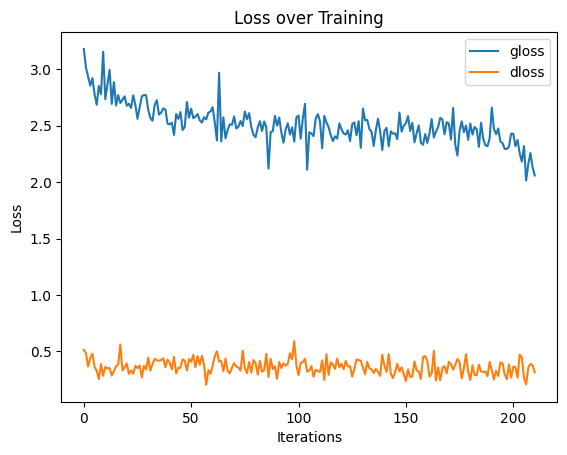

In [40]:
plot_loss(5)

In [17]:
load_id = 5
speakerA = "VCC2SF3"
speakerB = "VCC2TM1"
test = m2(speakerA, speakerB, load_id)
mcds5 = test.test()
mcdsFM[5] = np.mean(mcds5)

Directory 'outputs/generated_audio/5' created successfully.


100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


n_samples = 81
generator_lr_decay = 9.49667616334283e-10
discriminator_lr_decay = 9.496676163342831e-09


100%|██████████| 81/81 [00:28<00:00,  2.80it/s]


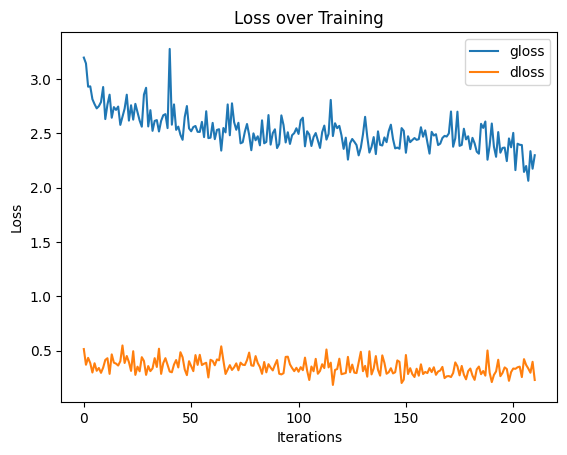

(3551.878158569336, 27.533939213715783)


In [18]:
# # Time stretch Pitch Shift
# train_id = 6
# speakerA = "VCC2SF3"
# speakerB = "VCC2TM1"
# cycleGAN = MaskCycleGANVCTraining(
#     speakerA=speakerA,
#     speakerB=speakerB,
#     datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
#     datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
#     train_id=train_id,
#     num_epochs=130,
#     freq_mask=False,
#     augment_type="timepitch",
#     aug_list=timePitchList,
#     load_id=None,
#     load_model=False
#     )
# loss6 = cycleGAN.train()
# glossesFM[6] = loss6[0][-1]
# glossesFM[6] = loss6[1][-1]
# print(cycleGAN.get_training_time())

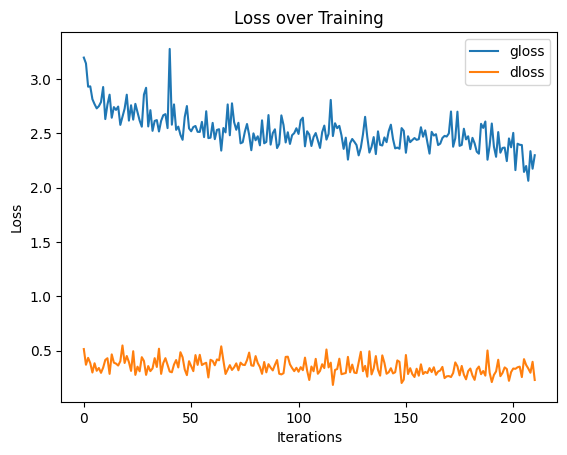

In [39]:
plot_loss(6)

In [19]:
load_id = 6
speakerA = "VCC2SF3"
speakerB = "VCC2TM1"
test = m2(speakerA, speakerB, load_id)
mcds6 = test.test()
mcdsFM[6] = np.mean(mcds6)

Directory 'outputs/generated_audio/6' created successfully.


100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


In [20]:
# Time stretch Pitch Shift
train_id = 7
speakerA = "VCC2SF3"
speakerB = "VCC2TM1"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=130,
    freq_mask=True,
    augment_type="timestretch",
    aug_list=timeList,
    load_id=None,
    load_model=False
    )
loss7 = cycleGAN.train()
glossesFM[7] = loss7[0][-1]
dlossesFM[7] = loss7[1][-1]
print(cycleGAN.get_training_time())

n_samples = 81
generator_lr_decay = 9.49667616334283e-10
discriminator_lr_decay = 9.496676163342831e-09


 32%|███▏      | 26/81 [00:09<00:19,  2.83it/s]


KeyboardInterrupt: 

In [22]:
load_id = 7
speakerA = "VCC2SF3"
speakerB = "VCC2TM1"
test = m2(speakerA, speakerB, load_id)
mcds7 = test.test()
mcdsFM[7] = np.mean(mcds7)

FileNotFoundError: [Errno 2] No such file or directory: 'model_checkpoint/7/GA2B.pth'

In [23]:
augment_names = ["None", "Time Stretch", "Pitch Shift", "Harmonic Distortion", "White Noise", "Frequency Mask", "Time Stretch and Pitch Shift", "Time Stretch and Frequency Mask"]
augments = [None, "timestretch", "pitchshift", "harmdist", "noise", None, "timepitch", "timestretch"]
freqmasks = [False, False, False, False, False, True, False, True]
auglists = [None, timeList, pitchList, None, None, None,timePitchList,timeList]

In [31]:
print(glossesFM)
print(dlossesFM)
print(mcdsFM)

[2.2283271479766795, 2.207811973689341, 2.380725363283749, 2.278054367819524, 2.168506850260415, 0.31281769275665283, 0.23123151063919067, 0]
[2.2283271479766795, 0.21292302012443542, 0.3295247554779053, 0.31994837522506714, 0.4232684373855591, 0, 0, 0]
[46.079803, 45.794754, 45.54554, 45.51956, 46.53347, 47.059517, 46.192196, 0]


In [24]:
fm_top = get_top_3_indices(mcdsFM)
mcdsV1 = [0] * 3
glossesV1 = [0] * 3
dlossesV1 = [0] * 3

n_samples = 10
generator_lr_decay = 3.3333333333333335e-07
discriminator_lr_decay = 3.3333333333333333e-06


100%|██████████| 10/10 [00:03<00:00,  2.98it/s]


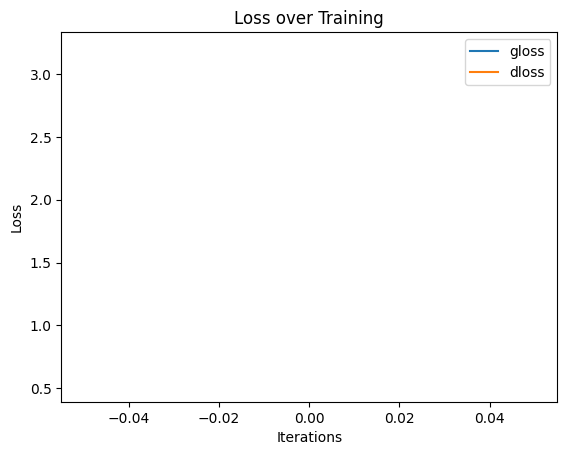

(12.888031721115112, 6.444015860557556)


In [27]:
#FM 1
train_id = 16
speakerA = "iu"
speakerB = "bruno_mars"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=3,
    freq_mask=freqmasks[fm_top[0]],
    augment_type=augments[fm_top[0]],
    aug_list=auglists[fm_top[0]],
    load_id=None,
    load_model=False
    )
loss0 = cycleGAN.train()
glossesV1[0] = loss0[0][-1]
dlossesV1[0] = loss0[1][-1]
print(cycleGAN.get_training_time())

In [28]:
load_id = 16
speakerA = "iu"
speakerB = "bruno_mars"
test = m1(speakerA, speakerB, load_id)
mcds0 = test.test()
mcdsV1[0] = np.mean(mcds0)

Directory 'outputs/generated_audio/16' created successfully.


  0%|          | 0/5 [00:00<?, ?it/s]


AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
#FM 2
train_id = 17
speakerA = "iu"
speakerB = "bruno_mars"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=1500,
    freq_mask=freqmasks[fm_top[1]],
    augment_type=augments[fm_top[1]],
    aug_list=auglists[fm_top[1]],
    load_id=None,
    load_model=False
    )
loss0 = cycleGAN.train()
glossesV1[1] = loss0[0][-1]
dlossesV1[1] = loss0[1][-1]
print(cycleGAN.get_training_time())

In [ ]:
load_id = 17
speakerA = "iu"
speakerB = "bruno_mars"
test = m1(speakerA, speakerB, load_id)
mcds1 = test.test()
mcdsV1[1] = np.mean(mcds1)

In [ ]:
#FM 3
train_id = 18
speakerA = "iu"
speakerB = "bruno_mars"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=1500,
    freq_mask=freqmasks[fm_top[2]],
    augment_type=augments[fm_top[2]],
    aug_list=auglists[fm_top[2]],
    load_id=None,
    load_model=False
    )
loss0 = cycleGAN.train()
glossesV1[2] = loss0[0][-1]
dlossesV1[2] = loss0[1][-1]
print(cycleGAN.get_training_time())

In [ ]:
load_id = 18
speakerA = "iu"
speakerB = "bruno_mars"
test = m1(speakerA, speakerB, load_id)
mcds1 = test.test()
mcdsV1[2] = np.mean(mcds1)

### VCC2M3 => VCCTF1

In [ ]:
mcdsMF = [0] * 8
glossesMF = [0] * 8
dlossesMF = [0] * 8

In [ ]:
# no augments
train_id = 8
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=130,
    freq_mask=False,
    augment_type=None,
    aug_list=None,
    load_id=None,
    load_model=False
    )
loss0 = cycleGAN.train()
glossesMF[0] = loss0[0][-1]
dlossesMF[0] = loss0[0][-1]
print(cycleGAN.get_training_time())

In [ ]:
load_id = 8
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
test = m2(speakerA, speakerB, load_id)
mcds0 = test.test()
mcdsMF[0] = np.mean(mcds0)

In [ ]:
# time stretch
train_id = 9
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=130,
    freq_mask=False,
    augment_type="timestretch",
    aug_list=timeList,
    load_id=None,
    load_model=False
    )
loss1 = cycleGAN.train()
glossesMF[1] = loss1[0][-1]
dlossesMF[1] = loss1[0][-1]
print(cycleGAN.get_training_time())

In [ ]:
load_id = 9
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
test = m2(speakerA, speakerB, load_id)
mcds1 = test.test()
mcdsMF[1] = np.mean(mcds1)

In [ ]:
# pitch shift
train_id = 10
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=130,
    freq_mask=False,
    augment_type="pitchshift",
    aug_list=pitchList,
    load_id=None,
    load_model=False
    )
loss2 = cycleGAN.train()
glossesMF[2] = loss2[0][-1]
dlossesMF[2] = loss2[1][-1]
print(cycleGAN.get_training_time())

In [ ]:
load_id = 10
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
test = m2(speakerA, speakerB, load_id)
mcds2 = test.test()
mcdsMF[2] = np.mean(mcds1)

In [ ]:
train_id = 11
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=130,
    freq_mask=False,
    augment_type="harmdist",
    aug_list=None,
    load_id=None,
    load_model=False
    )
loss3 = cycleGAN.train()
glossesMF[3] = loss3[0][-1]
dlossesMF[3] = loss3[1][-1]
print(cycleGAN.get_training_time())

In [ ]:
load_id = 11
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
test = m2(speakerA, speakerB, load_id)
mcds3 = test.test()
mcdsMF[3] = np.mean(mcds3)

In [ ]:
# pitch shift
train_id = 12
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=130,
    freq_mask=False,
    augment_type="noise",
    aug_list=noiseList,
    load_id=None,
    load_model=False
    )
loss4 = cycleGAN.train()
glossesMF[4] = loss4[0][-1]
dlossesMF[4] = loss4[1][-1]
print(cycleGAN.get_training_time())

In [ ]:
load_id = 12
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
test = m2(speakerA, speakerB, load_id)
mcds4 = test.test()
mcdsMF[4] = np.mean(mcds4)

In [ ]:
# pitch shift
train_id = 13
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=130,
    freq_mask=True,
    augment_type=None,
    aug_list=None,
    load_id=None,
    load_model=False
    )
loss5 = cycleGAN.train()
glossesFM[5] = loss5[0][-1]
glossesFM[5] = loss5[1][-1]
print(cycleGAN.get_training_time())

In [ ]:
load_id = 13
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
test = m2(speakerA, speakerB, load_id)
mcds5 = test.test()
mcdsMF[5] = np.mean(mcds5)

In [ ]:
# Time stretch Pitch Shift
train_id = 14
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=130,
    freq_mask=False,
    augment_type="timepitch",
    aug_list=timePitchList,
    load_id=None,
    load_model=False
    )
loss6 = cycleGAN.train()
glossesMF[6] = loss6[0][-1]
glossesMF[6] = loss6[1][-1]
print(cycleGAN.get_training_time())

In [ ]:
load_id = 14
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
test = m2(speakerA, speakerB, load_id)
mcds6 = test.test()
mcdsMF[6] = np.mean(mcds6)

In [ ]:
# Time stretch Pitch Shift
train_id = 15
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=130,
    freq_mask=True,
    augment_type="timestretch",
    aug_list=timeList,
    load_id=None,
    load_model=False
    )
loss7 = cycleGAN.train()
glossesMF[7] = loss7[0][-1]
dlossesMF[7] = loss7[1][-1]
print(cycleGAN.get_training_time())

In [ ]:
load_id = 15
speakerA = "VCC2SM3"
speakerB = "VCC2TF1"
test = m2(speakerA, speakerB, load_id)
mcds7 = test.test()
mcdsMF[7] = np.mean(mcds7)

In [ ]:
mf_top = get_top_3_indices(mcdsMF)
mcdsV2 = [0] * 3
glossesV2 = [0] * 3
dlossesV2 = [0] * 3

In [ ]:
#MF 1
train_id = 19
speakerA = "bruno_mars"
speakerB = "iu"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=1500,
    freq_mask=freqmasks[mf_top[0]],
    augment_type=augments[mf_top[0]],
    aug_list=auglists[mf_top[0]],
    load_id=None,
    load_model=False
    )
loss0 = cycleGAN.train()
glossesV2[0] = loss0[0][-1]
dlossesV2[0] = loss0[1][-1]
print(cycleGAN.get_training_time())

In [ ]:
load_id = 19
speakerA = "bruno_mars"
speakerB = "iu"
test = m1(speakerA, speakerB, load_id)
mcds1 = test.test()
mcdsV2[0] = np.mean(mcds1)

In [ ]:
#MF 2
train_id = 20
speakerA = "bruno_mars"
speakerB = "iu"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=1500,
    freq_mask=freqmasks[mf_top[1]],
    augment_type=augments[mf_top[1]],
    aug_list=auglists[mf_top[1]],
    load_id=None,
    load_model=False
    )
loss0 = cycleGAN.train()
glossesV2[1] = loss0[0][-1]
dlossesV2[1] = loss0[1][-1]
print(cycleGAN.get_training_time())

In [ ]:
load_id = 20
speakerA = "bruno_mars"
speakerB = "iu"
test = m1(speakerA, speakerB, load_id)
mcds1 = test.test()
mcdsV2[1] = np.mean(mcds1)

In [ ]:
#MF 3
train_id = 21
speakerA = "bruno_mars"
speakerB = "iu"
cycleGAN = MaskCycleGANVCTraining(
    speakerA=speakerA,
    speakerB=speakerB,
    datasetA_spec=loadPickleFile(f'data/training_data/{speakerA}_train_spec.pickle'),
    datasetB_spec=loadPickleFile(f'data/training_data/{speakerB}_train_spec.pickle'),
    train_id=train_id,
    num_epochs=1500,
    freq_mask=freqmasks[mf_top[2]],
    augment_type=augments[mf_top[2]],
    aug_list=auglists[mf_top[2]],
    load_id=None,
    load_model=False
    )
loss0 = cycleGAN.train()
glossesV2[2] = loss0[0][-1]
dlossesV2[2] = loss0[1][-1]
print(cycleGAN.get_training_time())

In [ ]:
load_id = 21
speakerA = "bruno_mars"
speakerB = "iu"
test = m1(speakerA, speakerB, load_id)
mcds2 = test.test()
mcdsV2[2] = np.mean(mcds2)